#  Regresión Logística
A partir de un conjunto de datos de entrada (características), nuestra salida será discreta (y no continua) por eso utilizamos Regresión Logística (y no Regresión Lineal). La Regresión Logística es un Algoritmo Supervisado y se utiliza para clasificación.

Vamos a clasificar problemas con dos posibles estados “SI/NO”: binario o un número finito de “etiquetas” o “clases”: múltiple. Algunos Ejemplos de Regresión Logística son:

- Clasificar si el correo que llega es Spam o No es Spam.
- Dados unos resultados clínicos de un tumor clasificar en “Benigno” o “Maligno”.
- El texto de un artículo a analizar es: Entretenimiento, Deportes, Política ó Ciencia.
- A partir de historial bancario conceder un crédito o no.



Para probar la regresión logística he creado un archivo csv (usuarios_win_mac_lin.csv) con datos de entrada a modo de ejemplo para clasificar si el usuario que visita un sitio web usa como sistema operativo Windows, Macintosh o Linux.

Nuestra información de entrada son 4 características:

- Duración de la visita en Segundos.
- Cantidad de Páginas Vistas durante la Sesión.
- Cantidad de Acciones del usuario (click, scroll, uso de checkbox, sliders,etc).
- Suma del Valor de las acciones (cada acción lleva asociada una valoración de importancia).

Como la salida es discreta, asignaremos los siguientes valores a las etiquetas:

- 0 – Windows
- 1 – Macintosh
- 2 - Linux

La muestra es pequeña: son 170 registros para poder comprender el ejercicio, pero recordemos que para conseguir buenos resultados siempre es mejor contar con un número abundante de datos que darán mayor exactitud a las predicciones.

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Cargamos los datos de entrada del archivo csv

In [3]:
dataframe = pd.read_csv(r"usuarios_win_mac_lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [4]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


Agruparemos por clases. 0 es Windows, 1 es Mac y 2 Linux

In [5]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


## Visualizamos los datos

El método drop de dataframe nos elimina determinadas etiquetas de filas y columnas. Como en este caso, no nos interesa las clases, lo quitamos

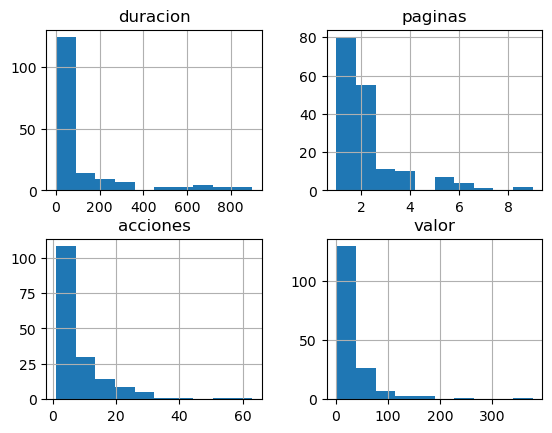

In [13]:
dataframe.drop(['clase'],axis=1).hist()
plt.show()

## Creamos el modelo

In [14]:
X = np.array(dataframe.drop(['clase'],axis=1))
y = np.array(dataframe['clase'])
X.shape

(170, 4)

In [18]:
model = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X,y)

LogisticRegression(max_iter=1000)

Una vez compilado nuestro modelo, le hacemos clasificar todo nuestro conjunto de entradas X utilizando el método “predict(X)” y revisamos algunas de sus salidas y vemos que coincide con las salidas reales de nuestro archivo csv.

In [22]:
predictions = model.predict(X)
print(predictions[0:5])

[2 2 2 2 2]


Y confirmamos cuan bueno fue nuestro modelo utilizando model.score() que nos devuelve la precisión media de las predicciones, en nuestro caso del 77%.

In [23]:
model.score(X,y)

0.7764705882352941

# Adicional: Validación del Modelo
Una buena práctica en Machine Learning es la de subdividir nuestro conjunto de datos de entrada en un set de entrenamiento y otro para validar el modelo (que no se utiliza durante el entrenamiento y por lo tanto la máquina desconoce). Esto evitará problemas en los que nuestro algoritmo pueda fallar por “sobregeneralizar” el conocimiento.

Para ello, subdividimos nuestros datos de entrada en forma aleatoria (mezclados) utilizando 80% de registros para entrenamiento y 20% para validar

In [26]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [28]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f " % (name, cv_results.mean())
print(msg)

Logistic Regression: 0.720879 


In [13]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.852941176471


# Clasificación de nuevos registros

In [37]:
X_new = pd.DataFrame({'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
model.predict(X_new.values)

array([2], dtype=int64)